In [2]:
import folium

Creating a map with all the locations of the favelas in brazil:
Favelas also happen to be known as slums which are pretty vulnerable natural disasters

In [4]:
from geopy.geocoders import Nominatim

locations = ['Vila Parisi', 'Cidade de Deus', 'Complexo do Alemão', 'Jacarezinho',
'Mangueira', 'Manguinhos', 'Morro da Babilônia', 'Rocinha', 'Serrinha', 'Vidigal',
'Vigário Geral', 'Heliópolis', 'Paraisópolis', 'Ilha das Cobras', 'Aglomerado da Serra',
'Morro do Papagaio', 'Acaba Mundo', 'Benjamin Constant', 'Cajueiro',
'Cantagalo–Pavão–Pavãozinho', 'Chácara do Céu', 'Chapéu Mangueira', 'Complexo do Lins',
'Complexo da Maré', 'Ladeira dos Tabajaras', 'Mineira', 'Morro Azul', 'Morro do Borel',
'Morro dos Cabritos', 'Morro do Cantagalo', 'Morro dos Macacos', 'Morro da Providência',
'Salgueiro', 'Tavares Bastos', 'Tuiuti', 'Vila do João', 'Vila Cruzeiro', 'Vila Pereira da Silva (Pereirão)', 'São Sebastião', 'Ladeira dos Funcionários',
'Parque boa Esperança', 'Clemente Ferreira', 'Parque Alegria', 'Chatuba do Caju',
'Quinta do Caju', 'Praia do Caju', 'Barro Preto', 'Barro Vermelho', 'Encontro', 'Árvore Seca', 'Cachoeirinha', 'Cachoeira Grande', 'Cotia',
'Boca do Mato', 'Morro da Fé', 'Caixa Dágua', 'Caracol', 'Chatuba',
'Grotão', 'Parque Proletário', 'Merendiba', 'São Carlos', 'Querosene',
'Terra Nostra', 'Conjunto Habitacional Bairro 13', 'Morro da Lagartixa', 'Morro da Quitanda',
'Morro da Pedreira', 'Conjunto da Fazenda Botafogo', 'Favelinha', 'Joana Darc', 'Boa Vista', 'Congonha', 'Morro do Sapé', 'Faz-Quem-Quer', 'Moisés Santana (Madureira)',
'Grota', 'Balaida', 'Sadock', 'Beco das Bruxas', 'Patolinha', 'Beco do Kisuco',
'Lambari', 'São José e Dendêzinho', 'Terra Nova', 'Primavera', 'Comunidade Oswaldo Cruz(Favelinha)', 'Lemos de brito','Aglomerado da Serra', 'Morro do Papagaio', 'Acaba Mundo',
'Florianópolis', 'Niterói', 'Grota do Surucucu', 'Morro do Estado',
'Benjamin Constant', 'Cajueiro', 'Cantagalo–Pavão–Pavãozinho', 'Chácara do Céu',
'Chapéu Mangueira', 'Cidade de Deus', 'Complexo do Lins', 'Complexo da Maré',
'Complexo do Alemão', 'Jacarezinho', 'Ladeira dos Tabajaras',
'Mangueira', 'Manguinhos', 'Mineira', 'Morro Azul', 'Morro da Babilônia', 'Morro do Borel', 'Morro dos Cabritos', 'Morro do Cantagalo', 'Morro dos Macacos',
'Morro da Providência', 'Rocinha', 'Salgueiro', 'Serrinha', 'Tavares Bastos'
'Tuiuti', 'Vidigal', 'Vila do João', 'Vigário Geral', 'Vila Cruzeiro', 'Vila Pereira da Silva (Pereirão)', 'Heliópolis', 'Paraisópolis', 'Vila Nova Jaguaré']


geolocator = Nominatim(user_agent='my_application')

location_dict = {}

for location in locations:
    location_geocode = geolocator.geocode(location)
    if location_geocode is not None:
        location_dict[location] = (location_geocode.latitude, location_geocode.longitude) # type: ignore

print(location_dict)

{'Vila Parisi': (-23.499734699999998, -46.625024280996), 'Cidade de Deus': (-22.94803, -43.362903), 'Complexo do Alemão': (-22.8606097, -43.2737506), 'Jacarezinho': (-23.159115, -49.973889), 'Mangueira': (-5.1054081, -42.820791), 'Manguinhos': (-22.8796755, -43.2508881), 'Morro da Babilônia': (-22.9573942, -43.1698023), 'Rocinha': (-22.9885204, -43.2482058), 'Serrinha': (-11.66199, -39.0034021), 'Vidigal': (-22.9952094, -43.2408556), 'Vigário Geral': (-22.8095333, -43.3097039), 'Heliópolis': (-10.6753416, -38.2815308), 'Paraisópolis': (-22.5541683, -45.7800024), 'Ilha das Cobras': (-22.896775400000003, -43.171506086355485), 'Morro do Papagaio': (-22.8967726, -43.6007003), 'Acaba Mundo': (-18.2873073, -43.4405685), 'Benjamin Constant': (-4.3782748, -70.0290603), 'Cajueiro': (-9.399589, -36.1524309), 'Cantagalo–Pavão–Pavãozinho': (-22.9815619, -43.1964087), 'Chácara do Céu': (-22.990296, -43.233544127848035), 'Chapéu Mangueira': (-22.9605097, -43.16757354705882), 'Complexo do Lins': (-22

In [5]:
import requests, json, re, folium
from bs4 import BeautifulSoup
import pandas as pd

# dynamically get the world-country boundaries 
res = requests.get("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json")
df = pd.DataFrame(json.loads(res.content.decode()))
df = df.assign(id=df["features"].apply(pd.Series)["id"],
         name=df["features"].apply(pd.Series)["properties"].apply(pd.Series)["name"])

# build a dataframe of country colours scraped from wikipedia
resp = requests.get("https://en.wikipedia.org/wiki/National_colours",)
soup = BeautifulSoup(resp.content.decode(), "html.parser")
colours = []
for t in soup.find_all("table", class_="wikitable"):
    cols = t.find_all("th")
    ok = (len(cols)>5 and cols[0].string.strip()=="Country" and cols[4].string.strip()=="Primary")
    if ok:
        for tr in t.find_all("tr"):
            td = tr.find_all("td")
            if len(td)>5:
                sp = td[4].find_all("span")
                c1 = re.sub("background-color:([\w,#,0-9]*).*", r"\1", sp[0]["style"])
                c2 = c1 if len(sp)==1 else re.sub("background-color:([\w,#,0-9]*).*", r"\1", sp[1]["style"])
                colours.append({"country":td[0].find("a").string, 
                                "colour1":c1,
                                "colour2":c2,

                               })
dfc = pd.DataFrame(colours).set_index("country")  

countries = ["Brazil"]

def style_fn(feature):
    cc = dfc.loc[feature["properties"]["name"]]
    ss= {'fillColor':f'{cc[0]}', 'color':f'{cc[1]}'}
    return ss

# create the base map
map = folium.Map(location = [-14.20, -51.90],
               tiles=None, #type: ignore
               zoom_start=6,
               control_scale=True)

# add Stamen terrain tiles to the map
folium.TileLayer('Stamen Terrain').add_to(map)

# overlay desired countries over folium map
for r in df.loc[df["name"].isin(countries)].to_dict(orient="records"):
    folium.GeoJson(r["features"], name=r["name"], tooltip=r["name"], style_function=style_fn).add_to(map)

for location, coords in location_dict.items():
    folium.Marker(location=coords, tooltip=location).add_to(map)

map


In [17]:
df = pd.read_csv("/home/dark/DataFest/GoogleEarthBrazilVisualizer/BrazilDisasterData.csv")

In [18]:
df.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,2000-0019-BRA,2000,19,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,2,NaN,8467;8555;9902;9956;9961;9985;11089;11543,"Barra Mansa, Campos Do Jordao, Pirangucu, Rese..."
1,2000-0809-BRA,2000,809,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,2,NaN,7192;7936;10160;11192;11523,"Alto Feliz, Belo Horizonte, Guaruja, Santa Leo..."
2,2000-0590-BRA,2000,590,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,2,NaN,9576;9598;9621,"Jaboatao Dos Guararapes, Moreno, Recife (Adm2)."
3,2000-0666-BRA,2000,666,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,1,685,NaN,Rio Grande Do Sul (Adm1).
4,2000-0456-BRA,2000,456,NaN,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,58.840648,2,NaN,10455,Porto Alegre (Adm2).


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     233 non-null    object 
 1   Year                                       233 non-null    int64  
 2   Seq                                        233 non-null    int64  
 3   Glide                                      16 non-null     object 
 4   Disaster Group                             233 non-null    object 
 5   Disaster Subgroup                          233 non-null    object 
 6   Disaster Type                              233 non-null    object 
 7   Disaster Subtype                           196 non-null    object 
 8   Disaster Subsubtype                        4 non-null      object 
 9   Event Name                                 44 non-null     object 
 10  Country                   

In [20]:
df.isnull().sum()/len(df)*100

Dis No                                         0.000000
Year                                           0.000000
Seq                                            0.000000
Glide                                         93.133047
Disaster Group                                 0.000000
Disaster Subgroup                              0.000000
Disaster Type                                  0.000000
Disaster Subtype                              15.879828
Disaster Subsubtype                           98.283262
Event Name                                    81.115880
Country                                        0.000000
ISO                                            0.000000
Region                                         0.000000
Continent                                      0.000000
Location                                       1.287554
Origin                                        55.793991
Associated Dis                                68.669528
Associated Dis2                               97

In [60]:
df.columns

Index(['type', 'features', 'id', 'name'], dtype='object')

In [21]:
df['Total Affected']

0      70000.0
1       2000.0
2      10000.0
3       5000.0
4          NaN
        ...   
228     3000.0
229    16350.0
230      180.0
231     4025.0
232     2400.0
Name: Total Affected, Length: 233, dtype: float64

In [42]:
list_lon = []
for i in df['Longitude']:
    if pd.notna(i): # check if i is not NaN
        list_lon.append(i)
    else:
        pass
print(list_lon)


[-43.36, -52.29, -44.0, -43.42, -44.231, -52.67, -47.88, -43.13, -41.68, -49.34, -45.43, -44.89, -44.07, -43.12, 31.26, -43.33, -48.16, -52.91, -38.11, -52.64, -67.99, -41.94, -50.75, -67.8, -56.442, -38.231, -44.095, -48.623, -46.124, -12.906, -45.901]


In [43]:
list_lat = []
for i in df['Latitude']:
    if pd.notna(i): # check if i is not NaN
        list_lat.append(i)
    else:
        pass
print(list_lat)

[-22.56, 2.81, -22.42, -22.72, -15.048, -30.25, -24.5, -22.37, -5.36, -25.1, -3.19, -16.59, -22.98, -22.54, 56.4778, -22.44, -23.783, -28.28, -8.65047, -30.34, -10.4897, -18.9538, -25.5689, -6.97805, -17.956, -8.096, -22.479, -24.206, -23.539, -39.27, -19.398]


In [48]:
# create a list of dictionaries containing longitude and latitude values for each point
list_coords = []
for lon, lat in zip(list_lon, list_lat):
    point = {'lon': lon, 'lat': lat}
    list_coords.append(point)

print(list_coords)


[{'lon': -43.36, 'lat': -22.56}, {'lon': -52.29, 'lat': 2.81}, {'lon': -44.0, 'lat': -22.42}, {'lon': -43.42, 'lat': -22.72}, {'lon': -44.231, 'lat': -15.048}, {'lon': -52.67, 'lat': -30.25}, {'lon': -47.88, 'lat': -24.5}, {'lon': -43.13, 'lat': -22.37}, {'lon': -41.68, 'lat': -5.36}, {'lon': -49.34, 'lat': -25.1}, {'lon': -45.43, 'lat': -3.19}, {'lon': -44.89, 'lat': -16.59}, {'lon': -44.07, 'lat': -22.98}, {'lon': -43.12, 'lat': -22.54}, {'lon': 31.26, 'lat': 56.4778}, {'lon': -43.33, 'lat': -22.44}, {'lon': -48.16, 'lat': -23.783}, {'lon': -52.91, 'lat': -28.28}, {'lon': -38.11, 'lat': -8.65047}, {'lon': -52.64, 'lat': -30.34}, {'lon': -67.99, 'lat': -10.4897}, {'lon': -41.94, 'lat': -18.9538}, {'lon': -50.75, 'lat': -25.5689}, {'lon': -67.8, 'lat': -6.97805}, {'lon': -56.442, 'lat': -17.956}, {'lon': -38.231, 'lat': -8.096}, {'lon': -44.095, 'lat': -22.479}, {'lon': -48.623, 'lat': -24.206}, {'lon': -46.124, 'lat': -23.539}, {'lon': -12.906, 'lat': -39.27}, {'lon': -45.901, 'lat': 

In [69]:

# dynamically get the world-country boundaries 
res = requests.get("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json")
df = pd.DataFrame(json.loads(res.content.decode()))
df = df.assign(id=df["features"].apply(pd.Series)["id"],
         name=df["features"].apply(pd.Series)["properties"].apply(pd.Series)["name"])

# build a dataframe of country colours scraped from wikipedia
resp = requests.get("https://en.wikipedia.org/wiki/National_colours",)
soup = BeautifulSoup(resp.content.decode(), "html.parser")
colours = []
for t in soup.find_all("table", class_="wikitable"):
    cols = t.find_all("th")
    ok = (len(cols)>5 and cols[0].string.strip()=="Country" and cols[4].string.strip()=="Primary")
    if ok:
        for tr in t.find_all("tr"):
            td = tr.find_all("td")
            if len(td)>5:
                sp = td[4].find_all("span")
                c1 = re.sub("background-color:([\w,#,0-9]*).*", r"\1", sp[0]["style"])
                c2 = c1 if len(sp)==1 else re.sub("background-color:([\w,#,0-9]*).*", r"\1", sp[1]["style"])
                colours.append({"country":td[0].find("a").string, 
                                "colour1":c1,
                                "colour2":c2,

                               })
dfc = pd.DataFrame(colours).set_index("country")  

countries = ["Brazil"]

def style_fn(feature):
    cc = dfc.loc[feature["properties"]["name"]]
    ss= {'fillColor':f'{cc[0]}', 'color':f'{cc[1]}'}
    return ss

# create the base map
map = folium.Map(location = [-14.20, -51.90],
               tiles=None, #type: ignore
               zoom_start=6,
               control_scale=True)

# add Stamen terrain tiles to the map
folium.TileLayer('Stamen Terrain').add_to(map)

# overlay desired countries over folium map
for r in df.loc[df["name"].isin(countries)].to_dict(orient="records"):
    folium.GeoJson(r["features"], name=r["name"], tooltip=r["name"], style_function=style_fn).add_to(map)

# create a map centered on the first point in the list
# add a marker for each point in the list
for point in list_coords:
    folium.Marker(location=[point['lat'], point['lon']], popup='Point',
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(map)

# display the map
map


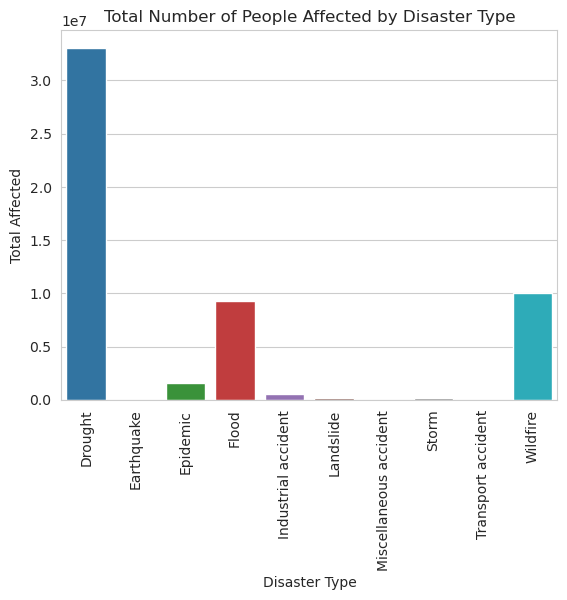

In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/dark/DataFest/GoogleEarthBrazilVisualizer/BrazilDisasterData.csv')
df = df.dropna(subset=['Total Affected', 'Disaster Type'])

affected_by_type = df.groupby('Disaster Type')['Total Affected'].sum()

sns.set_style("whitegrid")
ax = sns.barplot(x=affected_by_type.index, y=affected_by_type.values)
ax.set_title('Total Number of People Affected by Disaster Type')
ax.set_xlabel('Disaster Type')
ax.set_ylabel('Total Affected')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In Our research We have identfied one of the most damaging causes to the favelas are land slides, which drought is the number one cause of.